##**MODULE 1**

In [1]:
# importing libraries

import random, statistics, re, math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

from datetime import datetime 
from datetime import date

In [ ]:
sns.set()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

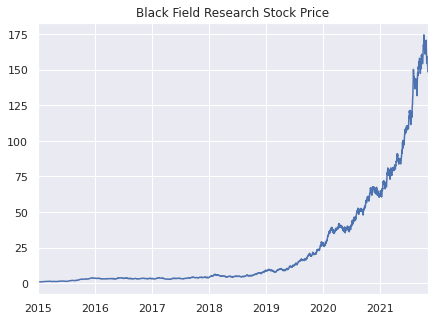

In [ ]:
our_index = pd.date_range(start='2015-01-01', periods=2500, freq='D')
df = pd.DataFrame(index = our_index)


df['Close'] = np.random.normal(loc=0.002, scale=0.02, size=2500)
df['Close'] = np.exp(df['Close'])
df['Close'].iloc[0] = 1
df['Close'] = df['Close'].cumprod()
df['Close'].plot(figsize=(7,5), title='Black Field Research Stock Price')

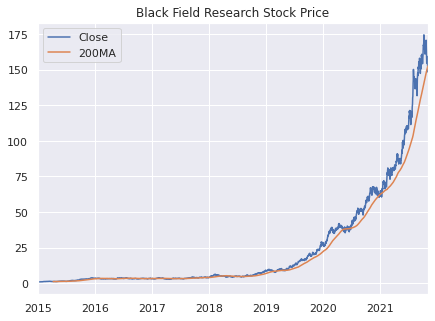

In [ ]:
df['200MA'] = df['Close'].rolling(100).mean()
df[['Close','200MA']].plot(figsize=(7,5), title='Black Field Research Stock Price')

In [ ]:
df['200MAdist'] = -1 + (df['Close'] / df['200MA'])

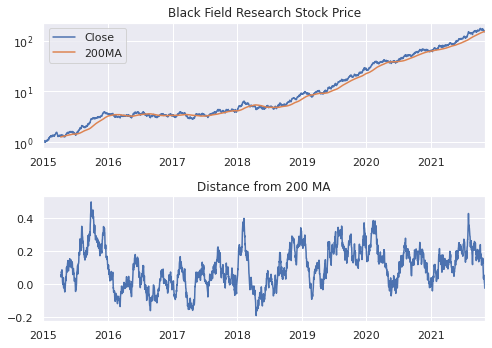

In [ ]:
f1 = plt.figure(figsize=(7,5))
ax1 = f1.add_subplot(2, 1, 1)
ax2 = f1.add_subplot(2, 1, 2)

df[['Close','200MA']].plot(title='Black Field Research Stock Price', ax=ax1, logy=True)
df['200MAdist'].plot(title='Distance from 200 MA', ax=ax2)
plt.tight_layout()

##**MODULE 2**

In [ ]:
!pip install nsepy
from nsepy import get_history

In [ ]:
def fetchData(ticker,startdate, enddate):

  # save OHLC columns
  stock = get_history(symbol = ticker,start = startdate, end = enddate)
  df = pd.DataFrame()
  stock.reset_index(inplace = True)
  df['Date'] = stock['Date']
  df['Open'] = stock['Open']
  df['High'] = stock['High']
  df['Low'] = stock['Low']
  df['Close'] = stock['Close']

  return df

# LIST OF NIFTY 50 Stocks
nifty50list = ['ADANIPORTS','ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BPCL', 'BHARTIARTL',
 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE',
 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'HDFC', 'ICICIBANK', 'ITC', 'IOC', 'INDUSINDBK', 'INFY', 'JSWSTEEL', 'KOTAKBANK',
 'LT', 'M&M', 'MARUTI', 'NTPC', 'NESTLEIND', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SHREECEM', 'SBIN', 'SUNPHARMA',
 'TCS', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TECHM', 'TITAN', 'UPL', 'ULTRACEMCO', 'WIPRO']
start_date = date(2014,1,1)
end_date = date(2022,1,21)

#path to save the data. Set this path for yourself
path = "/content/drive/MyDrive/Trading/Nifty_50_Daily_Data"


for ticker in nifty50list:
    
    #fetch data for this stock
    tickerData = fetchData(ticker,start_date,end_date)
    
    tickerData.to_csv(path + " " + ticker+'.csv')
    

In [ ]:
print("End Time: ",datetime.today())

End Time:  2022-07-01 05:12:02.329088


##**MODULE 3**

In [ ]:
!pip install mpl_finance

In [ ]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [ ]:
# df = pd.read_csv(r"C:\Users\pvarshney\Downloads\BlackField Research\Content\Nifty 50 Data\ITC.csv") # if running on local. 
df = pd.read_csv("/content/drive/MyDrive/Trading/Nifty_50_Daily_Data/Nifty_50_Daily_Data ITC.csv") # if running on google colab
df = df.drop(['Unnamed: 0'], axis = 1)
df
start_date = "2021-01-01"
end_date = "2021-06-31"
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

df.tail()

,Date,Open,High,Low,Close
1847,2021-06-24,204.45,204.65,202.55,203.25
1848,2021-06-25,204.00,205.60,203.75,205.05
1849,2021-06-28,205.90,205.90,203.35,203.60
1850,2021-06-29,203.60,205.30,203.15,203.30
1851,2021-06-30,204.30,204.40,202.55,202.70


In [ ]:
df.set_index('Date', inplace=True)

df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [ ]:
def plot_chart():
    fig, ax = plt.subplots()

    candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red')

    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    fig.show()

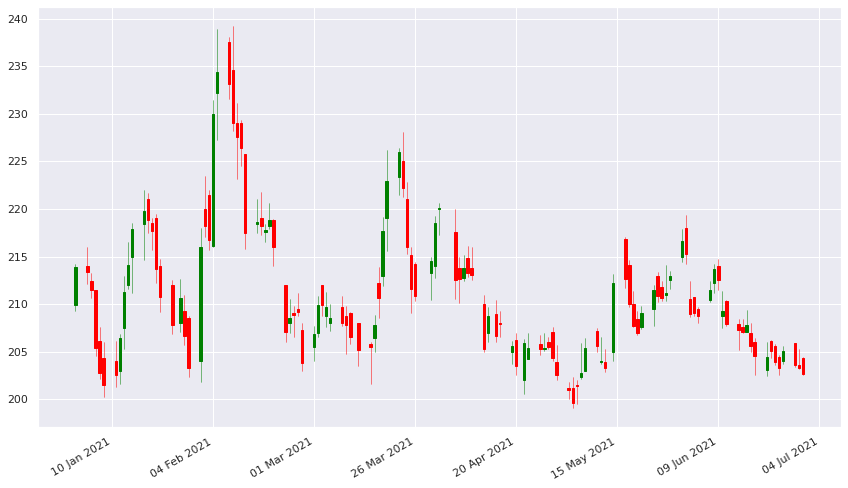

In [ ]:
plot_chart()

In [ ]:
def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
    and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
    and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

    return resistance

In [ ]:
levels = []
for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
        levels.append((i,df['Low'][i]))
    elif isResistance(df,i):
        levels.append((i,df['High'][i]))

In [ ]:
def plot_all():
    fig, ax = plt.subplots()

    candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red')

    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    for level in levels:
        plt.hlines(level[1],xmin=df['Date'][level[0]],\
                   xmax=max(df['Date']),colors='blue')
        fig.show()

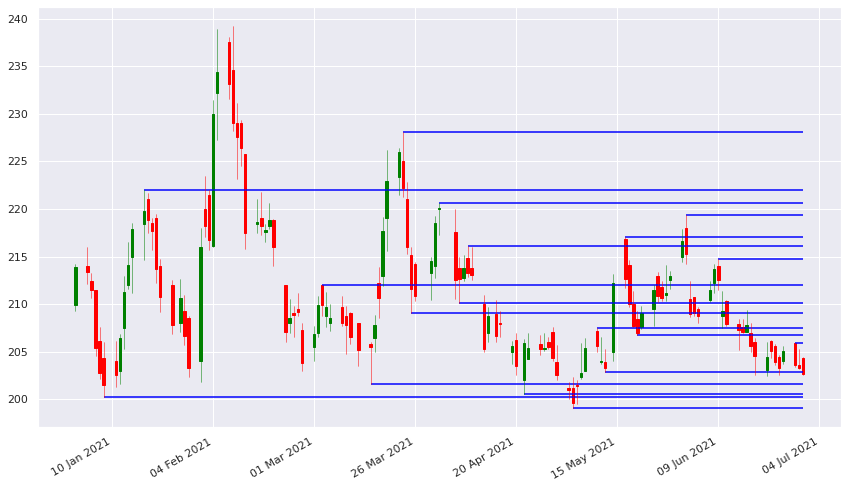

In [ ]:
plot_all()

In [ ]:
# this is twice the average size of a candle

s =  2 * np.mean(df['High'] - df['Low'])

In [ ]:
def isFarFromLevel(l):
    return np.sum([abs(l-x) < s  for x in levels]) == 0

In [ ]:
levels = []
for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
        l = df['Low'][i]

        if isFarFromLevel(l):
            levels.append((i,l))

    elif isResistance(df,i):
        l = df['High'][i]

        if isFarFromLevel(l):
            levels.append((i,l))

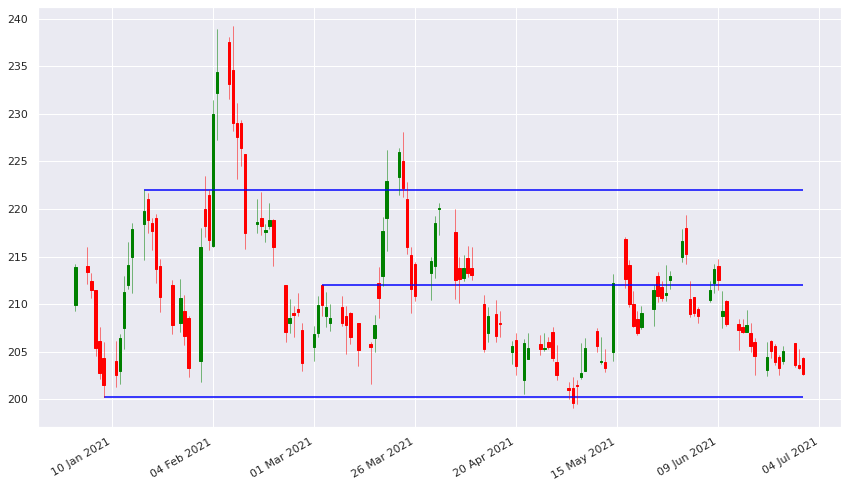

In [ ]:
plot_all()

In [ ]:
#References:

# https://towardsdatascience.com/detection-of-price-support-and-resistance-levels-in-python-baedc44c34c9

##**MODULE 3A**

In [ ]:
!pip install pandas_ta
import pandas_ta as ta

In [ ]:
# LIST OF NIFTY 50 Stocks
nifty50list = ['ADANIPORTS','ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BPCL', 'BHARTIARTL',
 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE',
 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'HDFC', 'ICICIBANK', 'ITC', 'IOC', 'INDUSINDBK', 'INFY', 'JSWSTEEL', 'KOTAKBANK',
 'LT', 'M&M', 'MARUTI', 'NTPC', 'NESTLEIND', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SHREECEM', 'SBIN', 'SUNPHARMA',
 'TCS', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TECHM', 'TITAN', 'UPL', 'ULTRACEMCO', 'WIPRO']


DATA_BASE_FOLDER = "/content/drive/MyDrive/Trading/Nifty_50_Daily_Data"

cols = ['Stock','LTP', "RSI", "50MA", "150MA", "200MA","200MAMonthBefore", "52WeekLow", "52WeekHigh"]

MarketWatch = pd.DataFrame(columns=cols)

for stocks in nifty50list:
    df = pd.read_csv(DATA_BASE_FOLDER + "/Nifty_50_Daily_Data" + " "+stocks+".csv", parse_dates=['Date'], index_col=['Date'])
    
    rsi = ta.rsi(df['Close'], timeperiod=14).values[-1]
    sma50 = ta.sma(df["Close"], length=50).values[-1]
    sma150 = ta.sma(df["Close"], length=150).values[-1]
    sma200   = ta.sma(df["Close"], length=200).values[-1]
    sma200monthBefore = ta.sma(df["Close"], length=200).values[-20]
    
    yrlow = min(df["Low"][-253:])
    yrhigh = max(df["High"][-253:])
    
    df2 = pd.DataFrame(columns=cols)
    df2 = {'Stock': stocks,'LTP':df["Close"].values[-1],'RSI': rsi , 
            '50MA': sma150,'150MA': sma150,'200MA': sma200,'200MAMonthBefore':sma200monthBefore,
            '52WeekLow':yrlow,
            '52WeekHigh':yrhigh }
    
    MarketWatch = MarketWatch.append(df2,ignore_index=True)

In [ ]:
MarketWatch.head()

,Stock,LTP,RSI,50MA,150MA,200MA,200MAMonthBefore,52WeekLow,52WeekHigh
0,ADANIPORTS,723.90,41.895497,729.023000,729.023000,739.48725,736.89275,500.10,901.0
1,ASIANPAINT,3274.85,40.826492,3179.426000,3179.426000,3071.29175,2978.28400,2260.00,3590.0
2,AXISBANK,712.50,49.389474,744.941667,744.941667,736.53225,737.19275,616.00,866.9
3,BAJAJ-AUTO,3419.80,54.307093,3690.005000,3690.005000,3753.79025,3784.38425,3027.05,4361.4
4,BAJFINANCE,7373.75,47.691273,7044.676333,7044.676333,6640.00225,6435.44650,4362.00,8050.0


In [ ]:
for i in MarketWatch.index:
        stock = MarketWatch['Stock'][i]
        ltp = MarketWatch['LTP'][i]
        rsi = MarketWatch['RSI'][i]
        sma50 = MarketWatch['50MA'][i]
        sma150 = MarketWatch['150MA'][i]
        sma200 = MarketWatch['200MA'][i]
        sma200monthBefore = MarketWatch['200MAMonthBefore'][i]
        yrlow = MarketWatch['52WeekLow'][i]
        yrhigh = MarketWatch['52WeekHigh'][i]
        
        isStockFiltered = True
        
        # Last Traded Price > 150 SMA and > 200 SMA
        if not (ltp > sma150 > sma200) :
            isStockFiltered = False
            continue
        
        # 150 SMA and > 200 SMA
        if not (sma150 > sma200) :
            isStockFiltered = False
            continue

        # 200 SMA trending up for at least 1 month
        if not (sma200 > sma200monthBefore) :
            isStockFiltered = False
            continue
        
        # 50 SMA> 150 SMA and 50 SMA> 200 SMA
#         if not (sma50 > sma150 > sma200) :
#             isStockFiltered = False
#             continue
           
        # Last Traded Price > 50 SMA
        if not (ltp > sma50) :
            isStockFiltered = False
            continue
           
        # Last Traded Price is at least 30% above 52 week low
        if not (ltp >=  (1.3*yrlow)) :
            isStockFiltered = False
            continue
           
        # Last Traded Price is within 25% of 52 week high
        if not (ltp >=  (0.75*yrhigh)) :
            isStockFiltered = False
            continue
        
        # If all of the above are true, add stock to filtered list
        if(isStockFiltered):
            print (stock + " stock met requirement ")

ASIANPAINT stock met requirement 
BAJFINANCE stock met requirement 
BAJAJFINSV stock met requirement 
BHARTIARTL stock met requirement 
GRASIM stock met requirement 
HCLTECH stock met requirement 
HINDALCO stock met requirement 
ICICIBANK stock met requirement 
IOC stock met requirement 
INFY stock met requirement 
LT stock met requirement 
NTPC stock met requirement 
ONGC stock met requirement 
RELIANCE stock met requirement 
SBILIFE stock met requirement 
SBIN stock met requirement 
SUNPHARMA stock met requirement 
TCS stock met requirement 
TATAMOTORS stock met requirement 
TECHM stock met requirement 
TITAN stock met requirement 
UPL stock met requirement 


##**Module 4**

Note: Link to download Nifty 500 csv list ⁉https://www1.nseindia.com/content/indices/ind_nifty500list.csv


1. repalce tg_api_token and tg_chat_id in the code below.


Discalimer: Not a trading advise

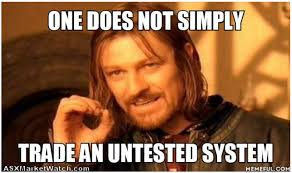

In [4]:
import os
import pandas as pd
import numpy as np
from nsepy import get_history
from datetime import date
from datetime import timedelta
import requests

In [5]:
def getData(ticker):
    # get latest last 10 day daily timeframe O-H-L-C data
    s =  date.today()-timedelta(days=10)
    e =  date.today()
    data = get_history(symbol=ticker, start=s, end=e)
    data100 = pd.DataFrame(data[-9:])
    return data100

In [6]:
#Replace. use the one given by the BotFather
tg_api_token = '5443860467:AAFd9uXMmr6rt_stIfPIJkz35UaM4dWXhuc'

#Replace. it's not 123456789, use the id you got from @userinfobot
tg_chat_id = '1382503106' 
def telegram_bot_sendtext(bot_message):

    bot_token = tg_api_token
    bot_chatID = tg_chat_id
    send_text = 'https://api.telegram.org/bot' + bot_token + '/sendMessage?chat_id=' + bot_chatID + '&parse_mode=Markdown&text=' + bot_message
    response = requests.get(send_text)

In [7]:
def StrategyOne(ohlc_1day,ticker):

    try:
        if ohlc_1day["High"][-3]>ohlc_1day["High"][-2] and ohlc_1day["High"][-2]>ohlc_1day["High"][-1]:
            if ohlc_1day["Low"][-3]<ohlc_1day["Low"][-2] and ohlc_1day["Low"][-2]<ohlc_1day["Low"][-1]:

                message = "Strategy 1 Buy:" + ticker + " at price : " + str(ohlc_1day['High'][-1]) + " with SL: "+ str(ohlc_1day['Low'][-1])
                print(message)
                telegram_bot_sendtext(message)
                

    except:
        pass


In [8]:
nifty500list = pd.read_csv("/content/drive/MyDrive/Trading/DB/ind_nifty500list.csv")
tickerNifty500 = []

for i in range(500):
    tickerNifty500.append(nifty500list["Symbol"][i])


for ticker in tickerNifty500:
    try:
        #fetch ohlc data for current stock
        ohlcData = getData(ticker)
        
        #pass it to the strategyOne function to find if it is a buy signal?
        StrategyOne(ohlcData,ticker)
        
    except Exception as e: print(e)

Strategy 1 Buy:BAJAJHLDNG at price : 4655.0 with SL: 4511.0
Strategy 1 Buy:CENTURYTEX at price : 817.95 with SL: 797.0
Strategy 1 Buy:MMTC at price : 40.35 with SL: 38.9
Strategy 1 Buy:MTARTECH at price : 1279.0 with SL: 1238.95
Strategy 1 Buy:RITES at price : 235.15 with SL: 232.25
Strategy 1 Buy:SIS at price : 456.0 with SL: 449.8
Strategy 1 Buy:SUDARSCHEM at price : 423.8 with SL: 416.8
Strategy 1 Buy:TTKPRESTIG at price : 833.4 with SL: 816.95


##**Module 5**